<h2> CHAPTER THREE : BASIC NUMERICAL TOOLS <h2>
    
***
<h3>3.0 NUMERICAL SOLUTION <h3/>

***    
### Examples (Finding the root of a function)


 **The Bisection Method** 
    
To use the bisection method of finding a root,
    
* start with two guesses on either side of the root: we’ll call guess to the left of the root a, and the guess to the right of the root b as shown in the figure below: ![fig 1](bisection.jpg)

* find the value of the function at the midpoint x between a and b. 

* Compare the signs of f(x) and f(a): 

  i. if the signs are different, then the root must be between a and x, so let b = x.
  
  ii. if the signs are the same, then the root must be between x and b, so let a = x. 


* a and b are such that the solution is still between the two, but they’re half as far apart! Repeat this process until the distance between a and b is less than the desired tolerance for your solution. 
    



`Example 3.0.1: Here’s a program to solve f (x) = 0, in Python code: `

In [102]:
#! /usr/bin/env python

#This program uses the bisection method to find the root of f(x) = exp(x)∗ ln(x) −x ∗ x = 0

from math import *         #math functions and constants

tolerance = 1.0e-6         #solution tolerance.

def f(x):                  #function definition : this is the function to which we are finding a (the) root.
            
        f = exp(x) * log(x) - x**2

        return f


#Get the initial guesses
a , b = input("Enter two guesses, separated by commas : " ).split(',')

a = int(a)
b = int(b)

dx = abs(b-a)                 #initial value of dx

while dx > tolerance:         #Repeat until dx < tolerance
    #print(dx)
    x = (a+b)/ 2.0
    if (f(a) * f(x)) < 0 :    #root is in left half
        b = x
    else :                   #root is in right half
        a = x
    dx = abs(b-a)            #update uncertainty in root location
    #print(dx)

#print ('Found f(x) = 0 at x = %.8f +/− %0.8f' is (x, tolerance))
print (f'Found f(x) = 0 at x = %.8f +/− %0.8f as {x,tolerance}')

Enter two guesses, separated by commas : 1,4
Found f(x) = 0 at x = %.8f +/− %0.8f as (1.69460129737854, 1e-06)


**The Newton Method**

Note that in the code above, the function could be any
function that returns a numeric value. In the example it’s a relatively sim-
ple numeric function, but it doesn’t have to be a numeric function in the
mathematical sense. You could just as well have a function that — for ex-
ample — runs a complete simulation and returns the final result. If you can
write a function that returns a continuous numeric result, you can use that
function with the bisection method.
With this in mind, it would be very handy to have a bisection-method
root-finding function that could be used in any general case. Something that
you could call like this would be ideal:
`answer = root bisection (Equation, First Guess, SecondGuess)`


`Here’s how to do just that:`

In [241]:
def root_bisection(f, a, b, tolerance=1.0e-6):
    '''
    Uses the bisection method to find a value x between a and b
    for which f(x) = 0 , to within the tolerance given.

    Default tolerance is 1.0e−6, if no tolerance is specified in the function call.

    '''
    a = int(a)
    b = int(b)
    dx = abs(b-a)
    
    while dx > tolerance:  #Repeat until dx < tolerance
        x = (a+b)/ 2.0
        if (f(a) * f(x)) < 0 : #root is in left half
            b = x
        else :  #root is in right half
            a = x
        dx = abs(b-a) # update uncertainty in root location
    
    return x

We can then include this function in any Python program, and
use it to find the root of any function you define. Just pass the
name of that function to `root_bisection ().`


`Example 3.0.2: Assuming we want to find the value of θ for which sin θ = 1. Here’s how to do just that:`

In [242]:
theta_0= root_bisection(sin,1,pi)
theta_0

Newton’s method of rootfinding requires that one knows both the function f (x) and its derivative f ' (x) = df / dx.
Start with a guess a, and calculate the values of f (a) and f ' (a). See figure below: ![Fig 2.3](newton.jpg)
Use the point-slope form of a line to find the new point b at which the slope from f(a) intersects the line y = 0.

f (a) = f ' (a) (a − b) + 0 =⇒ b = a − [ f (a) / f ' (a) ]

Repeat the process, starting from point b, and continue repeating until the
change from one step to the next is less than the maximum permissible error.

`Here's a Python code for that:`

In [251]:
def root_newton(f, df, guess, tolerance = 1.0e-6):
    '''
    Uses the Newton's method to find a value x near guess
    for which f(x) = 0 , to within the tolerance given.

    Default tolerance is 1.0e−6, if no tolerance is specified in the function call.
    It is required to pass this function both f(x) and f'(x).

    '''
    dx = 2*tolerance          #Initial dx > delta
    x=guess
    #x=int(x)
    while dx > tolerance:  #loop until dx < tolerance
        
        x1 = x - f(x)/df(x) #Point-slope form of line
        dx = abs(x-x1)      #How much have things changed?
        x = x1              #Here's the new value
    
    return x

`Example 3.0.3: Assuming we want to find the value of θ for which cos θ = 1. Here’s how to do just that:`

In [232]:
der = lambda fn:sym.diff(fn)
der(sym.cos(x))

-sin(x)

In [239]:
import sympy as sp
sp.init_printing()

x = sp.Symbol('x')
y,z,f = sp.symbols('y,z,f')

#g = sp.Function('g')

f = 




In [271]:

def f(x):     #function definition : this is the function to which we are finding a (the) root.
            
    f = cos(x)

    return f





def df(fn):
    fn = sym.cos(x)
    df = sym.diff(fn)
    return df
#df(fn)

theta_1 = root_newton(f, df(fn), 1) 
#theta_1

TypeError: 'Mul' object is not callable

In [151]:
def f(x):     #function definition : this is the function to which we are finding a (the) root.
            
    f = cos(x)

    return f
    
    
def df(x):
    df = -sin(x)
    return df

dx = 2*tolerance          #Initial dx > delta
x = input("Enter a value: " )    
x = int(x)    
while dx > tolerance:  #loop until dx < tolerance
    
    x1 = x - f(x)/df(x) #Point-slope form of line
    dx = abs(x-x1)      #How much have things changed?
    x = x1              #Here's the new value


Enter a value: 1


In [152]:
print(x)

1.5707963267948966


`Note:`
* Newton’s method is generally much faster than the bisection method.*

* It is not as robust, though. For best results, your initial guess should be near the actual solution, and should not be separated from the solution by any local extremes.*

In addition, Newton’s method does not work well near
discontinuities in f . 

`The biggest disadvantage to Newton’s method, though, is that it requires knowledge of f ' (x). If you don’t know, or can’t obtain, a function that describes the derivative, then Newton’s method is not an option.`

**The Secant Method** 

The secant method is a modification of Newton’s method which has the
advantage of not needing the derivative function.

* Start with two guesses, a and b. These should be near the desired solution, as with Newton’s method, but they don’t have to bracket the solution like they do with the bisection method.*

* Use the values of f (a) and f (b) to approximate the slope of the curve, instead of using a function f ' (x) to find the slope exactly, as was done in Newton’s method. (see figure below)* ![figure 2.4](secant.jpg/)

* Find the value of x at which the line through points (a, f (a)) and (b, f (b)) hits the x axis.*

* Repeat the process with the new point and the initial guess that is closest to the new point. Keep repeating until the change from one iteration to the next is less than the desired tolerance.*

`Problem : Write a generalized function implementing the secant method of root-finding.`

***
<h4>3.0.1 PYTHON LIBRARIES <h4/>

***  

Finding roots is a common-enough problem that people have written some good 
libraries to take care of it for you. 

One of those libraries is scipy.optimize, a subset of the “scientific Python” (scipy) library. Scipy includes 
implementations of the bisection method ( bisect () ), Newton’s method ( newton() ), and 
several others including the brentq() routine.

`Example 3.0.3: The brentq() routine can find roots about as fast as the secant method while guaranteeing to find an existing solution between the given endpoints.This is done by combining root-bracketing, bisection, and inverse quadratic interpolation. An example is as follows:`

In [1]:
from pylab import *
from scipy. optimize import brentq

x = brentq ( sin , 2 , 4)

# will find value of x between 2 and 4 for which sin (x) = 0

print (x , x-pi)

3.141592653589793 0.0


`Here's a tip:`

It’s important to know how to *“roll your own”* ; to be able to write routines for basic tasks such as root-finding. It is also important to know when to use existing code. *The brentq () routine is a good example of when to use existing code.* 

* **Unless you are finding roots of a pathologically difficult function, brentq() will find the solution quickly and accurately and save you a lot of work.** *

***
<h3>3.2 NUMERIC INTEGRATION <h3/>

***
    
    
![Figure 3.5](Int.jpg)

Consider the function shown in the figure above, depending on the functional form of 
f (x), it may not be possible to calculate the integral of f from a to b analytically.

The integral of f (x) from a to b is the area under the curve, though, which leads to the earliest numeric method of estimating that integral.

### Simple Method ###

The simplest method of estimating the integral shown in figure 2.5 above is to 
divide the integration range into N slices of width dx. Calculate the value of f (x i ) at some point on each slice, and find the area A i = f (x i )∆x for
each slice, as shown in this figure: ![figure 2.6.](Int1.png) The integral is then approximately: ![IntEqu](intequ.jpg)

`A python implementation of the simple integration method could look something like this:`

In [127]:
def int_simple(fn, a, b, N):
    '''
    A routine to do a simple rectangular−slice approximation of an integral.
    fn: the function to integrate
    a,b: lower and upper limits of integration respectively
    N: number of slices to take
    
    '''
    I = 0
    dx = (b-a)/float(N)
    for j in range(N):
        x = a + dx * j
        I = I + fn(x) * dx
    return I

`Example 3.0.4: Assuming we want to find the integral of a function f(x) = cos(x) with limits of integration a (lower limit) = 1 and b (upper limit) = 4 over N = 20 slices, then the python program is: `

In [134]:
int_cos_x = int_simple(cos, 1, 4, 20)
print(int_cos_x)

-1.5057296484473184


`Example 3.0.5: A simple program to calculate the integral of sin(x) from 0 to pi:`

In [140]:
def int_simple1(f,dx) :
    """
    Simplest integration possible, using uniform rectangular slices. 
    This gives a rather poor result, with the error on the order of dx.
    f [ ] should be a list of function values at x values separated by the interval dx.
    The limits of integration are x [0] −> x [ 0 ] + dx ∗ len(f).

    Note that this algorithm deosn't use the last point in f!
    """

    return dx*sum (f[0:-1]) #The sum() function is built−in, and does exactly what you would expect.



from math import *

N = 100           #Higher N gives better results.
a = 0.0
b = pi
interval = (b-a) / float(N)


x = [a + interval * i for i in range(N+1)]        #Calculate the values of x to use .

#notice that it takes N+1 function values to define N slices!


FunctionValues = [sin(value) for value in x]                 #Calculate the values of f(x)

print (f'The value of the integral is approximaely: {int_simple1(FunctionValues, interval)}')

The value of the integral is approximaely: 1.9998355038874436


### Trapezoid Method ###

We can greatly improve the efficiency of our integration by approximating
the slices as trapezoids instead of as rectangles, as shown in figure 2.7.
![fig 2.7](trap.jpg)

![eq 2](equ2.png)

This is probably the most efficient way to code the trapezoid method, al-
though the actual function is left as an exercise.

`Example 3.0.6:
Let us use the trapezoidal rule to calculate the integral of x4 − 2x + 1 from
x = 0 to x = 2. This is actually an integral we can do by hand, which means
we don’t really need to do it using the computer in this case, but it’s a good
first example because we can check easily if our program is working and how
accurate an answer it gives.Here is a program to do the integration using the trapezoidal rule with N = 10 slices:`

In [7]:
def f(x):
    return x**4-2*x+1


N = 10
a = 0; b = 2
h = (b-a)/N

trap = 0.5*f(a) + 0.5*f(b)

for k in range(1,N):
    trap += f(a+k*h)
    
print(h*trap)

4.50656


This is a straightforward translation of the trapezoidal rule formula into com-
puter code: we create a function that calculates the integrand, set up all the
constants used, evaluate the sum for the integral I(a, b) term by term, and then
multiply it by h and print it out.
The correct answer is:
![trapezoidal rule eg1](trap_eg.jpg)
So our calculation is moderately but not exceptionally accurate—the answer is
off by about 2%.

We can make the calculation more accurate by increasing the number of
slices, N.

`Example 3.0.7:`

  time, t (s)    x-velocity (m/s)    Distance (m)
-------------  ------------------  --------------
            0            0             nan
            1            0.069478        0.203499
            2            0.137694        0.278125
            3            0.204332        0.327587
            4            0.269083        0.362401
            5            0.331656        0.38745
            6            0.341561        0.35348
            7            0.399991        0.372283
            8            0.420132        0.355724
            9            0.481123        0.373953
           10            0.600344        0.43151


<AxesSubplot:xlabel='time, t (s)'>

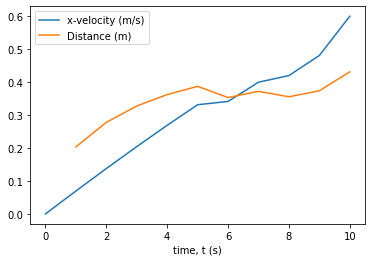

In [203]:
import pandas as pd
from tabulate import tabulate
vel_table = np.array([[0, 0],[1, 0.069478],[2, 0.137694],
             [3, 0.204332], [4, 0.269083], [5, 0.331656], [6, 0.341561], [7, 0.399991],
            [8, 0.420132], [9, 0.481123], [10, 0.600344]])
#print(tabulate(vel_table))
vel_table = pd.DataFrame(vel_table, columns=['time, t (s)', 'x-velocity (m/s)'])

##type(vel_table)
#vel_table = vel_table.set_index(['time, t (s)'])
#vel_table.loc[0:5]
m = vel_table.loc[:,'time, t (s)']
n = vel_table.loc[:, 'x-velocity (m/s)']

def vel_fn(x,t):
    return x/t


N = 10
a = 0; b = 10
h = (b-a)/N

trap = 0.5*vel_fn(n,m) + 0.5*vel_fn(n,m)

for k in range(1,N):
    trap += vel_fn(n,m+k*h)
    

d_vals = h*trap
#d_vals= pd.DataFrame(d_vals)
vel_dist_table = vel_table['Distance (m)'] = d_vals 
vel_dist_table = vel_table
z = vel_dist_table.set_index(['time, t (s)'])
print(tabulate(z, headers=('time, t (s)', 'x-velocity (m/s)', 'Distance (m)')))
z.plot()

<AxesSubplot:xlabel='time, t (s)'>

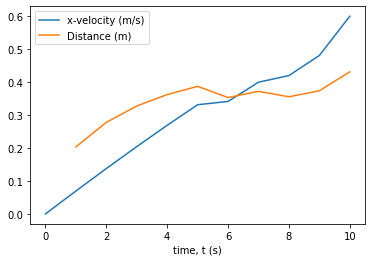

In [185]:

vel_table

,"time, t (s)",x-velocity (m/s),Distance (m)
0,0.0,0.000000,NaN
1,1.0,0.069478,0.203499
2,2.0,0.137694,0.278125
3,3.0,0.204332,0.327587
4,4.0,0.269083,0.362401
5,5.0,0.331656,0.387450
6,6.0,0.341561,0.353480
7,7.0,0.399991,0.372283
8,8.0,0.420132,0.355724
9,9.0,0.481123,0.373953


In [133]:
vel_fn(m, n)

0           NaN
1     14.393045
2     14.524961
3     14.681988
4     14.865302
5     15.075862
6     17.566408
7     17.500394
8     19.041635
9     18.706235
10    16.657117
dtype: float64

`Probem: Write a problem that uses the trapezoidal method to return the integral of a function over a given range, using a given number of sample points. The actual calculation should be a function of the form int_trap (f,dx), where f is a list of function values and dx is the slice width.`

### Simpson's Method ###

Simpson's Rule, named after the English mathematician Thomas Simpson (1710 - 1761),  is a numerical method that approximates the value of a definite integral by using quadratic functions.

Simpson's Rule is based on the fact that given three points, we can find the equation of a quadratic through those points. To obtain an approximation of the definite integral ![simp_int](simp_int.jpg)using Simpson's Rule, we partition the interval
 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>a</mi>
      <mo>,</mo>
      <mi>b</mi>
    </mrow>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
</math>
 into an even number 
 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>n</mi>
</math>
 of subintervals, each of width:
 
 <math xmlns="http://www.w3.org/1998/Math/MathML" display="inline">
  <mi mathvariant="normal">&#x394;</mi>
  <mi>x</mi>
  <mo>=</mo>
  (<mfrac>
    <mrow data-mjx-texclass="ORD">
      <mi>b</mi>
      <mo>&#x2212;</mo>
      <mi>a</mi>
    </mrow>
  </mfrac>) / <mi>n</mi>
</math>

On each pair of consecutive subintervals
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mrow data-mjx-texclass="ORD">
      <mrow data-mjx-texclass="ORD">
        <msub>
          <mi>x</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>i</mi>
            <mo>&#x2212;</mo>
            <mn>1</mn>
          </mrow>
        </msub>
      </mrow>
      <mo>,</mo>
      <mrow data-mjx-texclass="ORD">
        <msub>
          <mi>x</mi>
          <mi>i</mi>
        </msub>
      </mrow>
    </mrow>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
  <mo>,</mo>
</math>,
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mrow data-mjx-texclass="ORD">
      <mrow data-mjx-texclass="ORD">
        <msub>
          <mi>x</mi>
          <mi>i</mi>
        </msub>
      </mrow>
      <mo>,</mo>
      <mrow data-mjx-texclass="ORD">
        <msub>
          <mi>x</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>i</mi>
            <mo>+</mo>
            <mn>1</mn>
          </mrow>
        </msub>
      </mrow>
    </mrow>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
  <mo>,</mo>
</math>
 we consider a quadratic function
 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
  <mo>=</mo>
  <mi>a</mi>
  <mrow data-mjx-texclass="ORD">
    <msup>
      <mi>x</mi>
      <mn>2</mn>
    </msup>
  </mrow>
  <mo>+</mo>
  <mi>b</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>c</mi>
</math>
 such that it passes through the points
 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mrow data-mjx-texclass="ORD">
      <mrow data-mjx-texclass="ORD">
        <msub>
          <mi>x</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>i</mi>
            <mo>&#x2212;</mo>
            <mn>1</mn>
          </mrow>
        </msub>
      </mrow>
      <mo>,</mo>
      <mi>f</mi>
      <mrow data-mjx-texclass="INNER">
        <mo data-mjx-texclass="OPEN">(</mo>
        <mrow data-mjx-texclass="ORD">
          <mrow data-mjx-texclass="ORD">
            <msub>
              <mi>x</mi>
              <mrow data-mjx-texclass="ORD">
                <mi>i</mi>
                <mo>&#x2212;</mo>
                <mn>1</mn>
              </mrow>
            </msub>
          </mrow>
        </mrow>
        <mo data-mjx-texclass="CLOSE">)</mo>
      </mrow>
    </mrow>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
  <mo>,</mo>
</math>
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mrow data-mjx-texclass="ORD">
      <mrow data-mjx-texclass="ORD">
        <msub>
          <mi>x</mi>
          <mi>i</mi>
        </msub>
      </mrow>
      <mo>,</mo>
      <mi>f</mi>
      <mrow data-mjx-texclass="INNER">
        <mo data-mjx-texclass="OPEN">(</mo>
        <mrow data-mjx-texclass="ORD">
          <mrow data-mjx-texclass="ORD">
            <msub>
              <mi>x</mi>
              <mi>i</mi>
            </msub>
          </mrow>
        </mrow>
        <mo data-mjx-texclass="CLOSE">)</mo>
      </mrow>
    </mrow>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
  <mo>,</mo>
</math>
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mrow data-mjx-texclass="ORD">
      <mrow data-mjx-texclass="ORD">
        <msub>
          <mi>x</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>i</mi>
            <mo>+</mo>
            <mn>1</mn>
          </mrow>
        </msub>
      </mrow>
      <mo>,</mo>
      <mi>f</mi>
      <mrow data-mjx-texclass="INNER">
        <mo data-mjx-texclass="OPEN">(</mo>
        <mrow data-mjx-texclass="ORD">
          <mrow data-mjx-texclass="ORD">
            <msub>
              <mi>x</mi>
              <mrow data-mjx-texclass="ORD">
                <mi>i</mi>
                <mo>+</mo>
                <mn>1</mn>
              </mrow>
            </msub>
          </mrow>
        </mrow>
        <mo data-mjx-texclass="CLOSE">)</mo>
      </mrow>
    </mrow>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
  <mo>.</mo>
</math>
![simpson's method fig](simp.jpg)
if the function
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>f</mi>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mi>x</mi>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
</math>
is continuous on
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>a</mi>
      <mo>,</mo>
      <mi>b</mi>
    </mrow>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
</math>, then ![simp_formula](simp_form.jpg)



`Example 3.0.6: A Simpson’s method integration function is shown in this example:`


In [25]:
def int_simpson(f,dx):
    """
    Simpson's rule, using uniform slices. f[] should be a list of function values, separated on the x-axis by
    the interval dx. The limits of integration are x[0] −> x [ 0 ] + dx ∗ len(f)
    
    This particular algorithm doesn't require that there be an even number of intervals (odd number of points):
    instead, it adds the last section separately if necessary.
    """
    N=len(f) # number of points
    
    integral = 0.0 #initial value of integral
    
    for i in range (1, N-1, 2):
        integral = integral + f[i-1] + 4.0*f[i] + f[i+1]  #add up terms
        
    integral = integral * dx / 3.0
    
    if (N % 2) == 0:
        integral = integral + dx * (5.0*f[-1] + 8.0*f[-2] - f[-3])/12.0
        
    return integral
  


In [26]:
c =[0,2,4,6,8]
int_simpson(c, 2) 

32.0

`Example 3.0.7 : Use the Simpson's method with n = 4 to approximate the integral`
    ![simp_example 3.0.7](simp_eg1.jpg)
    
`Let's see the solution here:`

In [3]:
'''
Let's define a function (Simp_int) that uses the Simpson's rule to integrate a function, Fn
from lower limit a, to upper limit b with n subintervals
'''

def simp_int(Fn, n, a, b):      
    dx = (b-a)/n
    Fn_val = []
    i_val = []
    from numpy import arange
    for i,j in enumerate(arange(a, (b+dx), dx)):
        Fx = Fn(j)
        Fn_val.append(Fx)
        i_val.append(i)
    
        if (n == 2):
            if i == 0:
                integral = Fn_val[i]
            elif i == 1:
                integral = integral + 4 * Fn_val[i]
            else :
                integral = integral + Fn_val[i]
                
        if (n == 4):
            if i == 0:
                integral = Fn_val[i]
            elif i == 1:
                integral = integral + 4 * Fn_val[i]
            elif i == 2:
                integral = integral + 2 * Fn_val[i]
            elif i == 3:
                integral = integral + 4 * Fn_val[i]
            else :
                integral = integral + Fn_val[i]
        
        if (n == 6):
            if i == 0:
                integral = Fn_val[i]
            elif i == 1:
                integral = integral + 4 * Fn_val[i]
            elif i == 2:
                integral = integral + 2 * Fn_val[i]
            elif i == 3:
                integral = integral + 4 * Fn_val[i]
            elif i == 4:
                integral = integral + 2 * Fn_val[i]
            elif i == 5:
                integral = integral + 4 * Fn_val[i]
            else :
                integral = integral + Fn_val[i]
    integral = integral * dx / 3.0

    #integral = (Fn_val[0]+ 4 * Fn_val[1] + 2 * Fn_val[2] + 4 * Fn_val[3]+ Fn_val[4])*dx/3   
        
    return integral



'''
Note that in this case:
Fn = Sqrt(x)
n = number of subintervals = 4
a = lower limit = 0
b = upper limit = 2
'''

#Now let's call our defined simpson's integral function on our function to be integrated

simp_int(sqrt,4,0,8)


14.855493563580856

`Example 3.0.8. Now let's look at another example:`

Approximate the integral :
![simp_example 3.0.8](simp_eg2.jpg)

using Simpson's Rule with n = 2 subintervals.

In [4]:
#First let's define our main function to be integrated (1/x) as:

def fn_1(x):
    fn_1 = 1/x
    return fn_1

'''
Note that in this case:
Fn = 1/x
n = 2
a = 1
b = 2
'''
#Now let's call our defined simpson's integral function on our function to be integrated

simp_int(fn_1, 2, 1, 2 )


0.6944444444444443

`Example 3.0.9: A function f(x) is given as a table of values. Approximate the area under the curve y = f(x) from x = -4 and x = 8 using Simpson's Rule with n = 6 subintervals.`
![simp_example 3.0.9](simp_eg31.jpg)
`Here's the solution:`

In [263]:
'''
Note that our work becomes easier since the table of values have already been given.

'''
a = -4 ; b =8

dx = (8-(-4))/6

#(f(x=0)+ 4f(x=1) + 2f(x=2) + 4f(x=3) + 2f(x=4) + 4f(x=5) + f(x=6)) * dx/3

int_sum  =(1 + 4*3 + 2*4 + 4*4 + 2*6 + 4*9 + 14)
ans = int_sum * dx/3
print('The area under the curve y = f (x) is :', ans)

The area under the curve y = f (x) is : 66.0


`Problem 1: Find out other methods of numerical integration.`

`Problem 2: A function f (x) is given by the table of values. Approximate the area under the curve y = f (x) between x = 0 and x = 4 using Simpson's method with n = 4 subintervals`
![problem 3.2](prob_1.jpg) 

`Problem 3: Approximate the area under the curve `![problem 3.3](prob_3.jpg)
`between x = -2 and x = 2 using Simpson's rule with n = 4 subintervals.`

`Problem 4: Compare the results of the simple integration method, the trapezoid integration method and Simpson's method of integration for the following integrals:`
![problem 3.4](prob_4.jpg)
`For each part, try it with more and with fewer slices to determine
how many slices are required to give an ‘acceptable’ answer. (If you
double the number of slices and still get the same answer, then try half
as many, etc.) Parts (c) and (d) are particularly interesting in this
regard. In your submitted work, describe roughly how many points
were required, and explain.

Note : The function in (d) is the Fresnel Cosine Integral, used in op-
tics. It may be helpful in understanding what’s going on with your
integration if you make a graph of the function.`

## 3.3 NUMERIC DIFFERENTIATION ##

The 'sonic ranger' is one of the tools commonly used in an introductory physics laboratory. It uses pulses of sound to determine the distance between a sensor and some object, typically a dynamics cart. This instrument measures distance only, however, we would like to calculate the velocity and acceleration as well.
This is where numeric differentiation becomes useful.

One way to find a numeric derivative is to start with the normal definition of a derivative:
![der](der.jpg)

So we could approximate the derivative by taking the difference between two successive data points and dividing by the distance between them:
![der 1](der1.jpg)

where the notation![der 1](der2.jpg)is used to indicate the discrete nature of our data and simplify the expression. This simple approach works, but there are better methods.

In [6]:
from scipy.misc import derivative

print(derivative(sin, pi, dx=0.1, order=5))

-0.9999966706326076


In [194]:
proper_round(2.5)

3.0